In [15]:
import sys
sys.path.append('../..')

In [16]:
import numpy
import pathlib


In [17]:
path_results =  pathlib.Path('./outputs')
if not(path_results.exists()):
    path_results.mkdir()
path_output = path_results
# path_output = path_results / pathlib.Path('nlm')
# if not(path_output.exists()):
#     path_output.mkdir()

In [18]:
FONT_SIZE = 30

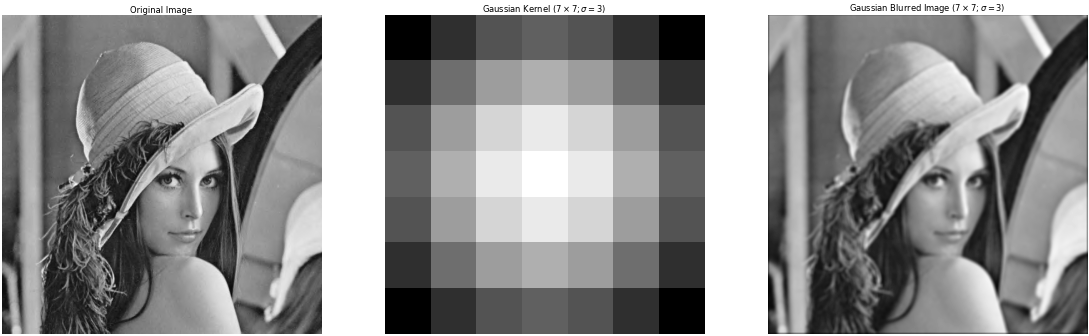

In [19]:

import matplotlib.pyplot
import scipy.signal

import lasp.io
import lasp.filters


img = lasp.io.read(pathlib.Path('lena.tif'))
# print(img.dtype)
# img = lasp.io.read(pathlib.Path('phantom.npy'))
h = lasp.filters.gaussian_filter(size=7, sigma=3)
img_blurred = numpy.array(scipy.signal.convolve2d(img, h, mode='same'))

# lasp.io.save(img, path_output / 'h.png')
# lasp.io.save(img_blurred, path_output / 'img_blurred.png')


figure = matplotlib.pyplot.figure(figsize=(70, 70), dpi=20)

_ = matplotlib.pyplot.subplot(1, 3, 1)
_ = matplotlib.pyplot.axis('off')
_ = matplotlib.pyplot.title(
    label = 'Original Image', 
    fontsize = FONT_SIZE
)
_ = matplotlib.pyplot.imshow(img, cmap='gray')

_ = matplotlib.pyplot.subplot(1, 3, 2)
_ = matplotlib.pyplot.axis('off')
_ = matplotlib.pyplot.title(
    label = 'Gaussian Kernel ($7 \\times 7; \sigma = 3$)', 
    fontsize = FONT_SIZE
)
_ = matplotlib.pyplot.imshow(h, cmap='gray')

_ = matplotlib.pyplot.subplot(1, 3, 3)
_ = matplotlib.pyplot.axis('off')
_ = matplotlib.pyplot.title(
    label = 'Gaussian Blurred Image ($7 \\times 7; \sigma = 3$)', 
    fontsize = FONT_SIZE
)
_ = matplotlib.pyplot.imshow(img_blurred, cmap='gray')


In [20]:
# Convert in double
img = img.astype(numpy.double)
h = h.astype(numpy.double)
img_blurred = img_blurred.astype(numpy.double)

In [21]:
# import typing

# def dx(image: numpy.ndarray) -> numpy.ndarray:

#     nb_rows, nb_cols = numpy.shape(image)
#     image_derivated = numpy.zeros(shape=(nb_rows, nb_cols))

#     image_derivated[:, 1:nb_cols] = \
#         image[:, 1:nb_cols] - image[:, 0:nb_cols-1]

#     image_derivated[:, 0] = image[:, 0] - image[:, nb_cols-1]

#     return image_derivated

# def dy(image: numpy.ndarray) -> numpy.ndarray:
    
#     nb_rows, nb_cols = numpy.shape(image)
#     image_derivated = numpy.zeros(shape=(nb_rows, nb_cols))
    
#     image_derivated[1:nb_rows, :] = \
#         image[1:nb_rows, :] - image[0:nb_rows-1, :]

#     image_derivated[0, :] = image[0, :] - image[nb_rows-1, :]

#     return image_derivated

# def dxT(image: numpy.ndarray) -> numpy.ndarray:

#     nb_rows, nb_cols = numpy.shape(image)
#     image_derivated = numpy.zeros(shape=(nb_rows, nb_cols))
    
#     image_derivated[:, 0:nb_cols-1] = \
#         image[:, 0:nb_cols-1] - image[:, 1:nb_cols]

#     image_derivated[:, nb_cols-1] = image[:, nb_cols-1] - image[:, 0]

#     return image_derivated

# def dyT(image: numpy.ndarray) -> numpy.ndarray:
    
#     nb_rows, nb_cols = numpy.shape(image)
#     image_derivated = numpy.zeros(shape=(nb_rows, nb_cols))
    
#     image_derivated[0:nb_rows-1, :] = \
#         image[0:nb_rows-1, :] - image[1:nb_rows, :]

#     image_derivated[nb_rows-1, :] = image[nb_rows-1, :] - image[0, :]

#     return image_derivated

# def differential_matrix(
#     derivate: typing.Callable[[numpy.ndarray], numpy.ndarray],
#     shape_out: tuple[int, int]
# ) -> numpy.ndarray:
#     N, M = shape_out
#     return derivate(numpy.eye(N, M))


In [22]:
# print(Dx(numpy.eye(3, 3)))
# print(Dy(numpy.eye(3, 3)))
# print(Dxt(numpy.eye(3, 3)))
# print(Dyt(numpy.eye(3, 3)))

# DX = differential_matrix(dx, (3, 3))
# DY = differential_matrix(dy, (3, 3))
# DXT = differential_matrix(dxT, (3, 3))
# DYT = differential_matrix(dyT, (3, 3))

# print(DX)
# print(DY)
# print(DXT)
# print(DYT)


In [23]:
def decimation(image: numpy.ndarray, d: int) -> numpy.ndarray:
    if d <= 0:
        raise AssertionError('d <= 0')
    return numpy.copy(image[0::d, 0::d])

def decimation_transpose(image: numpy.ndarray, d: int) -> numpy.ndarray:
    nb_rows, nb_cols = image.shape
    out = numpy.zeros((d*nb_rows, d*nb_cols))
    out[0::d, 0::d] = numpy.copy(image)
    return out

# def blockproc(im: numpy.ndarray, block_sz: numpy.ndarray, func):
#     h, w = im.shape
#     m, n = block_sz
#     for x in range(0, h, m):
#         for y in range(0, w, n):
#             block = im[x:x+m, y:y+n]
#             block[:,:] = func(block)
#     return im

# blockproc(decimation_transpose(arr, d), (3, 3), print)
# def block_mm(nr, nc, nb, m, x1):
#     x1 = blockproc()

import lasp.utils

def fourier_diagonalization(kernel: numpy.ndarray, shape_out: numpy.ndarray) -> numpy.ndarray:
    nb_rows, nb_cols = kernel.shape
    kernel_padded = numpy.zeros(shape_out)
    kernel_padded[:nb_rows, :nb_cols] = numpy.copy(kernel)
    print(kernel_padded)
    center = numpy.round(numpy.array(kernel.shape)/2).astype(int) 
    print(center)
    circshifted = lasp.utils.circshift(kernel_padded, 1-center)
    print(circshifted)
    return numpy.fft.fft2(circshifted)

# fourier_diagonalization(
#      laplacian = numpy.array(
#         [
#             [0, -1, 0], 
#             [-1, 4, -1], 
#             [0, -1, 0]
#         ]
#     ),
    
# )

def normalize(img: numpy.ndarray) -> numpy.ndarray:
    i_min = numpy.min(img)
    i_max = numpy.max(img)
    normalized = (img - i_min) / (i_max - i_min)
    return normalized


# def denormalize(img: numpy.ndarray, i_min: int, i_max: int) -> numpy.ndarray:
#     denormalized = (i_max - i_min) * img + i_min
#     return denormalized

In [40]:
# import cv2

import PIL.Image
import lasp.thresholding

def split_bregman_sr(
    g: numpy.ndarray,
    h: numpy.ndarray,
    beta0: float,
    beta1: float,
    sigma: float,
    d: float,
    nb_iterations: int
) -> numpy.ndarray:
    

    # Define decipation
    ## decimation: S
    # S = lambda x: decimation(x, d)
    ## decimation transposed: S^{T}
   
    g_decim = decimation(g, d)
 
    bicubic_resized = numpy.array(
        PIL.Image.Image.resize(
            PIL.Image.fromarray(g_decim, mode = 'L'), 
            g.shape, 
            PIL.Image.Resampling.BICUBIC
        )
    )

    # print(bicubic_resized)

    # print(resized)

    
    # Compute eigens values of H_{BCCB}
    ## H_{BCCB} = F^{T} h_bccb_diag F
    h_bccb_diag = fourier_diagonalization(h, numpy.array(g.shape))
    # h2_bccb_diag = h_bccb_diag*numpy.conj(h_bccb_diag)
    h2_bccb_diag = numpy.abs(h_bccb_diag)**2

    # Create laplacian approximation Delta
    laplacian = numpy.array(
        [
            [0, -1, 0], 
            [-1, 4, -1], 
            [0, -1, 0]
        ]
    )
    laplacian_diag = fourier_diagonalization(laplacian, numpy.array(g.shape))

    f = numpy.copy(g)
    d_x = numpy.zeros_like(g)
    d_y = numpy.zeros_like(g)
    b_x = numpy.zeros_like(g)
    b_y = numpy.zeros_like(g)

    
    # Compute constant terms
    cst1 = (1/d) * h2_bccb_diag + (2*beta0+sigma) * laplacian_diag
    # print('cst1_min: {} \t cst1_max: {}'.format(numpy.min(cst1), numpy.max(cst1)))

    ## H^T S^{T} y
    # cst2 = numpy.fft.ifft2(h_bccb_diag * numpy.fft.fft2(ST(g)))
    # cst2 = numpy.real(numpy.fft.ifft2(h_bccb_diag * numpy.fft.fft2(bicubic_resized)))
    cst2 = h_bccb_diag * numpy.fft.fft2(bicubic_resized)
    # print('cst2_min: {} \t cst2_max: {}'.format(numpy.min(cst2), numpy.max(cst2)))

   

    for no_iter in range(0, nb_iterations):

        # print(numpy.min(f), numpy.max(f))
        # print('\nIter {}'.format(no_iter))

        # Compute f^{k+1}
        a = cst1
        # b = sigma*(Dxt(d_x-b_x)+Dyt(d_y-b_y)) + cst2
        b = numpy.fft.fft2(sigma*(Dxt(d_x-b_x)+Dyt(d_y-b_y))) + cst2
        # b = cst2
        # print('b_min: {} \t b_max: {}'.format(numpy.min(b), numpy.max(b)))
        # f = numpy.real(numpy.fft.ifft2(numpy.fft.fft2(b) / a))
        f = numpy.real(numpy.fft.ifft2(b / a))
        # print('f_min: {} \t f_max: {}'.format(numpy.min(f), numpy.max(f))) 

        
        grad_f = numpy.array([ Dx(f), Dy(f) ])
        
        # print('grad_x_min: {} \t grad_x_max: {}'.format(
        #         numpy.min(grad_f[0]), 
        #         numpy.max(grad_f[0])
        #     )
        # )

        # print('grad_y_min: {} \t grad_y_max: {}'.format(
        #         numpy.min(grad_f[1]), 
        #         numpy.max(grad_f[1])
        #     )
        # )

        # Compute d_{x}^{k+1} and d_{y}^{k+1}
        s_x = grad_f[0] + b_x
        s_y = grad_f[1] + b_y
        s = s_x + s_y * 1j
        ss = lasp.thresholding.soft(s, beta1 / sigma)
        d_x = numpy.real(ss)
        d_y = numpy.imag(ss)

        # s = numpy.sqrt(s_x**2 + s_y**2)
        # coef = numpy.max(s - (beta1 / sigma), 0)
        # d_x = numpy.where(s > 0, coef * (s_x / s), d_x)
        # d_y = numpy.where(s > 0, coef * (s_y / s), d_y)

        # print('dx_min: {} \t dx_max: {}'.format(numpy.min(d_x), numpy.max(d_x)))
        # print('dy_min: {} \t dy_max: {}'.format(numpy.min(d_y), numpy.max(d_y)))


        # Compute b_{x}^{k+1} and b_{y}^{k+1}
        b_x = b_x + (grad_f[0] - d_x)
        b_y = b_y + (grad_f[1] - d_y)

        # print('bx_min: {} \t bx_max: {}'.format(numpy.min(b_x), numpy.max(b_x)))
        # print('by_min: {} \t by_max: {}'.format(numpy.min(b_y), numpy.max(b_y)))

    # print(g.shape, f.shape)


    return f

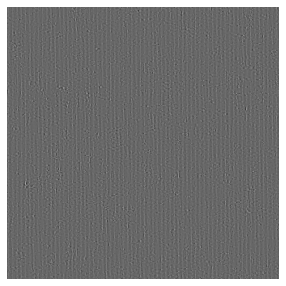

In [41]:
# f = split_bregman_sr(
#     g = img_blurred,
#     h = h,
#     beta0 = (1/2)*1/100,
#     beta1 = 1/100,
#     sigma = 2/100,
#     d = 1,
#     nb_iterations = 300
# )

f = split_bregman_sr(
    g = img_blurred,
    h = h,
    beta0 = (1/2)*1/100,
    beta1 = 1/100,
    sigma = 2/100,
    d = 1,
    nb_iterations = 300
)
normalized = normalize(f)
grey_level = numpy.round(normalized*255).astype(numpy.uint8)
figure = matplotlib.pyplot.figure(figsize=(5, 5))
matplotlib.pyplot.axis('off')
_ = matplotlib.pyplot.imshow(grey_level, cmap='gray')
lasp.io.save(grey_level, path_output / 'res_beta0=0.005_beta1=0.01_sigma=0.02_d=1_iter=300.png')


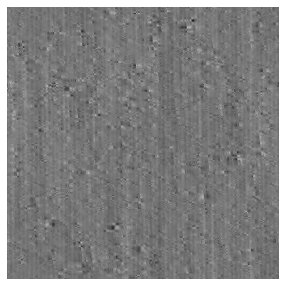

In [44]:
f = split_bregman_sr(
    g = img_blurred,
    h = h,
    beta0 = 1,
    beta1 = 1,
    sigma = 2,
    d = 1,
    nb_iterations = 300
)
normalized = normalize(f)
grey_level = numpy.round(normalized*255).astype(numpy.uint8)
figure = matplotlib.pyplot.figure(figsize=(5, 5))
matplotlib.pyplot.axis('off')
_ = matplotlib.pyplot.imshow(grey_level, cmap='gray')
lasp.io.save(grey_level, path_output / 'res_beta0=1_beta1=1_sigma=2_d=1_iter=300.png')

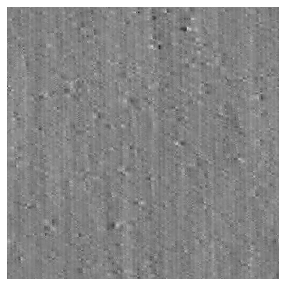

In [46]:
f = split_bregman_sr(
    g = img_blurred,
    h = h,
    beta0 = 1,
    beta1 = 0.5,
    sigma = 2,
    d = 1,
    nb_iterations = 300
)
normalized = normalize(f)
grey_level = numpy.round(normalized*255).astype(numpy.uint8)
figure = matplotlib.pyplot.figure(figsize=(5, 5))
matplotlib.pyplot.axis('off')
_ = matplotlib.pyplot.imshow(grey_level, cmap='gray')
lasp.io.save(grey_level, path_output / 'res_beta0=1_beta1=0.5_sigma=2_d=1_iter=300.png')

In [42]:
# x = numpy.linspace(start=-100, stop=100)
# epsilon = 50
# y = lasp.thresholding.soft(x, epsilon)
# matplotlib.pyplot.plot(x, y)
# matplotlib.pyplot.show()